<a href="https://colab.research.google.com/github/JakeANam/AIstudy24/blob/master/%EC%9D%B4%EC%9B%83%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

senario:
- 농어철인 여름에 농어 대량 입고
- 상점에서는 업계최초로 농어를 무게 단위로 판매 예정
- 무게 단위로 판매할 건데 그러면 가격 측정도 원활하고 소비자의 합리적 구매도 가능할 듯
- 공급처에서 생선 무게를 잘못 측정해서 보냈다면?! (오차범위!)


* 항목추가 - 농어무게 재측정
* 다른 데이터의 정상범위가 있으니까 예측할 수 있지 않을까?

회귀: 예측하는 것
필요한 것?: sample
-> 외부에서 56개의 sample 받아서 처리 ㄱㄱ
이번에는 아마, kn.score() = 1 X

지도학습 방법
* 분류(2진분류: Yes or No)
* 회귀(결과 값이 확률로 나온다)

회귀 - 두 변수 사이의 상관 관계를 분석하는 방법

In [2]:
#Linux 명령어: Colab의 가상머신에 나눔폰트 설치하고 적용하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [3]:
import numpy as np
# 농어 sample 자료
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])



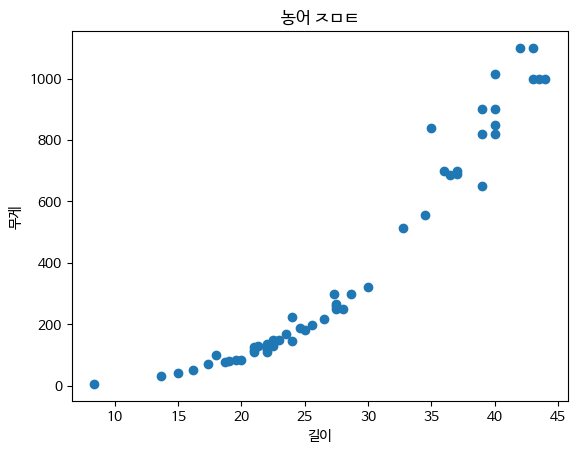

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

plt.scatter(perch_length, perch_weight)
plt.xlabel('길이')
plt.ylabel('무게')
plt.title('농어 ㅈㅁㅌ')
plt.show()

In [7]:
# perch_info = np.column_stack((perch_length, perch_weight))

In [53]:
# 최근접 이웃 알고리즘에서의 회귀: 예측하려는 샘플에 가장 가까운 샘플 K개를 선택한다(이웃알고리즘은 기본 5개)
# 이웃 sample들의 class를 확인하여 다수 class를 새로운 sample의 class로 예측
# sample에 가장 가까운 sample k개 선택
# 그 sample의 target값을 그 갯수로 나눈 평규닝 target 값으로 사용된다.


# 산포도 판단 결과: 길이와 무게는 정비례
# 이 data를 토대로 훈련과 test를 진행해보자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

# sklearn의 train_test_split 함수 사용해서 훈련set, test_set 생성
# 훈련세트는 2차원 배열 사용
# 2차원 배열을 사요ㅕㅇ해야 하므로 배열 형태 변환 (reshape()사용) -> (4,) -> (2,2)

In [23]:
test_array = np.array([1,2,3,4,5,6])
print(test_array)
print(test_array.shape)
test_array = test_array.reshape(3, 2)
print(test_array.shape)
print(test_array)

# 이번에는 특성이 1개이므로 수동으로 2차원 배열 만들어야 한다

[1 2 3 4 5 6]
(6,)
(3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [54]:
# train_input과 test_input을 2차원 배열로 전환
# train_input(42,) -> (42,1) train_input.reshape(42,1)
# numpy는 배열의 크리를 자동으로 지정하는 기능 포함 -> reshape(-1)
train_input = train_input.reshape(-1, 1) # 원소 갯수로 모두 채으라는 의미
test_input = test_input.reshape(-1, 1) # -1 쓰면 매번 원소 크기 생각할 필요 X
print(train_input.shape, test_input.shape)


(42, 1) (14, 1)


In [55]:
# 전처리 끝

# 훈련 시작
from sklearn.neighbors import KNeighborsRegressor # 회귀 알고리즘용 class (KNeighborsClassifier와 혼동X)

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [56]:
knr.score(test_input, test_target)
# 회귀인 경우의 평가 값 = 결정계수 R^2
# R^2 = 1- ((target-예측)^2의 합) / ((target-평균)^2의 합)
# R^2는 0에 가까워지고, 예측이 target에 가까워지면 1에 가까운 값이 나온다

0.992809406101064

In [57]:
# sklearn.metrics : 여러가지 측정 도구를 제공
from sklearn.metrics import mean_absolute_error # 절대값 오차를 평균화해서 계산

test_prediction = knr.predict(test_input) # 테스트 세트에 대한 예측 생성
mae = mean_absolute_error(test_target, test_prediction) # 평균값 절댓값 오차 계산
print(mae)

19.157142857142862


In [58]:
print(knr.score(train_input, train_target)) # 훈련한 model사용해서 훈련세트 점수 확인
print(knr.score(test_input, test_target))

0.9698823289099254
0.992809406101064


In [59]:
# model을 훈련 세트에 훈련하면 훈련 세트에 잘 맞는 model 생성됨
# 훈련세트의 점수는 높은데 테스트세트에서 점수가 나쁘면?: 과대적합
# 과소 적합: 훈련세트보다 테스트 세트에서 점수가 높다면
# sklearn의 알고리즘 기본값 3개로 조절하기

knr.n_neighbors = 3
knr.fit(train_input, train_target)


KNeighborsRegressor(n_neighbors=3)

In [60]:
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))


0.9804899950518966
0.9746459963987609


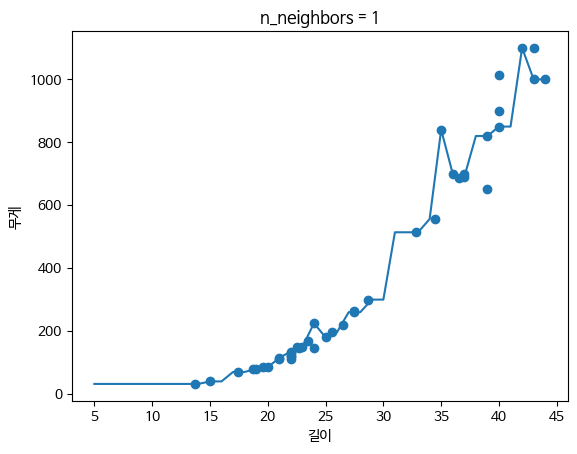

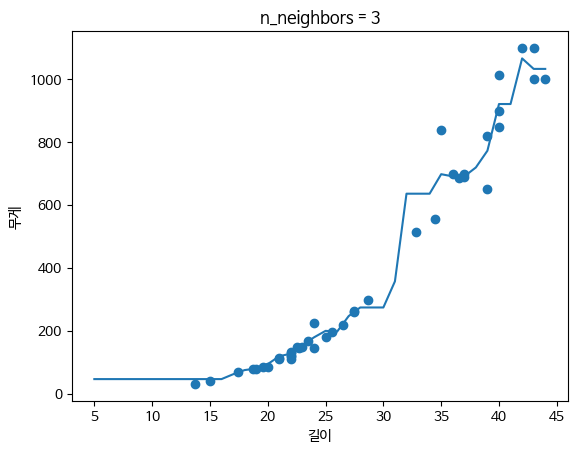

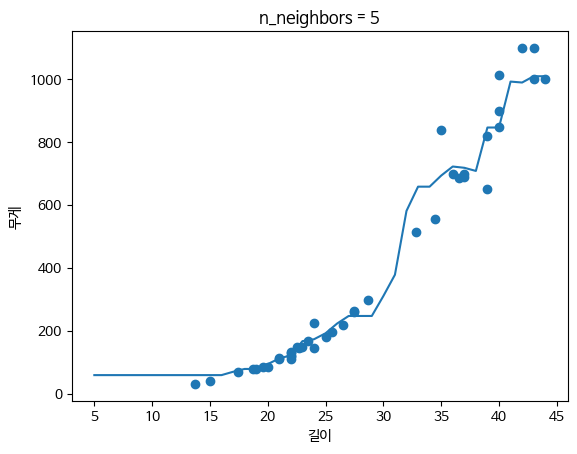

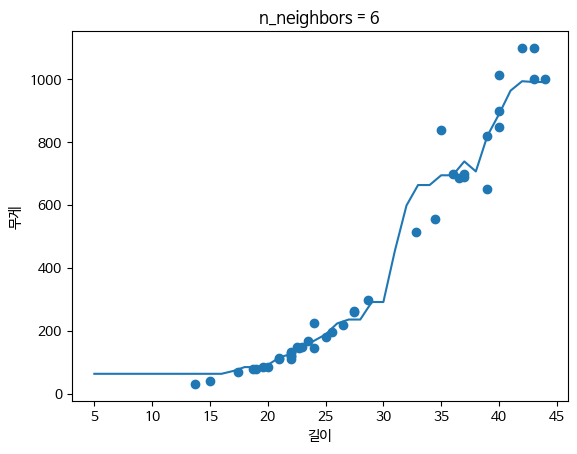

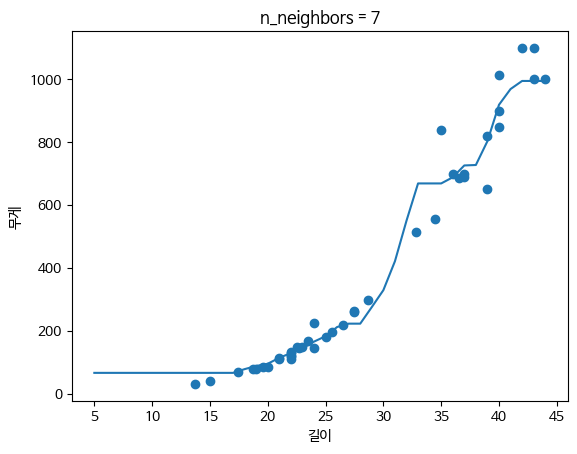

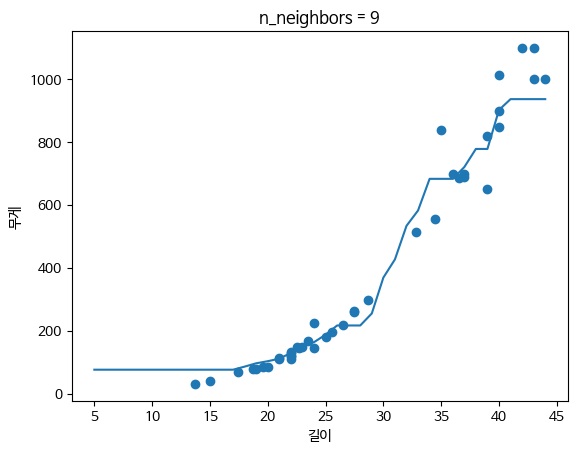

In [70]:
# 5 ~ 45의 x 좌표 생성
x = np.arange(5,45).reshape(-1,1)

for n in [1,3,5,6,7,9]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)

  prediction = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x,prediction)
  plt.title("n_neighbors = {}".format(n))
  plt.xlabel('길이')
  plt.ylabel('무게')
  plt.show()